# 6강: 데이터 시각화

## 🎯 학습 목표
- Matplotlib 기본 사용법 완전 정복
- 선 그래프, 막대 그래프 생성 기법
- 히스토그램과 산점도 그리기 실습
- Seaborn을 이용한 고급 시각화 마스터

---

## 📚 강의 개요 (60분)
1. Matplotlib 기본 사용법 (15분)
2. 선 그래프, 막대 그래프 생성 (15분)
3. 히스토그램과 산점도 그리기 (15분)
4. Seaborn 고급 시각화 (10분)
5. 실습 및 정리 (5분)


## 1. Matplotlib 기본 사용법

### 1.1 데이터 시각화가 중요한 이유

**👁️ 왜 데이터 시각화가 필요할까요?**

인간의 뇌는 **시각적 정보를 텍스트보다 60,000배 빠르게 처리**합니다!

**📈 데이터 시각화의 목적:**
1. **패턴 발견**: 숫자로는 보이지 않는 트렌드와 패턴 발견
2. **이상치 탐지**: 비정상적인 데이터 포인트를 쉽게 식별
3. **의사소통**: 복잡한 분석 결과를 쉽게 전달
4. **인사이트 도출**: 데이터에서 비즈니스 인사이트 발견

**🎯 그래프 유형별 사용 시기:**

| 그래프 유형 | 언제 사용? | 예시 |
|-------------|------------|------|
| **선 그래프** | 시간에 따른 변화 | 주가, 매출 추이, 온도 변화 |
| **막대 그래프** | 범주별 비교 | 지역별 판매량, 제품별 매출 |
| **히스토그램** | 데이터 분포 확인 | 나이 분포, 시험 점수 분포 |
| **산점도** | 두 변수 관계 | 키-몸무게, 광고비-매출 관계 |
| **파이 차트** | 전체 중 비율 | 시장 점유율, 예산 배분 |

📊 시각화 기본 개념:

1. Figure (그림판): 전체 그래프를 담는 캔버스
2. Axes (축): 실제 그래프가 그려지는 영역
3. Plot (플롯): 데이터를 시각적으로 표현하는 방법
4. Legend (범례): 그래프의 설명
5. Annotation (주석): 특정 지점에 대한 설명



In [1]:
# !pip install matplotlib scikit-learn

In [2]:
# !pip install numpy pandas

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')#시스템 폰트 확인
font_list[:10]

['C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\mtproxy3.ttf',
 'C:\\Windows\\Fonts\\전주완판본 순R.ttf',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\Windows\\Fonts\\H2PORM.TTF',
 'C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\swisscki.ttf',
 'C:\\Windows\\Fonts\\NotoSansKR-VF.ttf']

In [4]:
import sklearn
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
# 데이터 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')



print("=== 데이터 시각화 라이브러리 ===")
print(f"Matplotlib 버전: {plt.matplotlib.__version__}")

# 기본 데이터 생성 - 월별 매출 데이터
months = ['1월', '2월', '3월', '4월', '5월', '6월',
          '7월', '8월', '9월', '10월', '11월', '12월']
sales_2022 = [120, 135, 148, 162, 185, 201, 195, 210, 178, 165, 142, 158]
sales_2023 = [135, 149, 167, 178, 198, 215, 208, 225, 192, 180, 165, 175]



=== 데이터 시각화 라이브러리 ===
Matplotlib 버전: 3.9.4


## 2. 색상과 스타일 완전 정복

### 2.1 Matplotlib 색상 설정 방법

**🎨 5가지 색상 설정 방법:**

1. **기본 색상 문자**: `'r'`, `'g'`, `'b'`, `'c'`, `'m'`, `'y'`, `'k'`, `'w'`
2. **색상 이름**: `'red'`, `'green'`, `'blue'`, `'orange'`, `'purple'`
3. **헥스 코드**: `'#FF5733'`, `'#33FF57'`, `'#3357FF'`
4. **RGB 튜플**: `(0.2, 0.4, 0.6)`
5. **투명도**: `alpha=0.7` (0=투명, 1=불투명)

### 2.2 라인 스타일과 마커

**라인 스타일:**
- **실선**: `-` (기본값)
- **대시선**: `--` (중요한 트렌드)
- **점선**: `:` (참고선)
- **점대시**: `-.` (예측값)

**마커 스타일:**
- **원**: `'o'` (가장 일반적)
- **사각형**: `'s'` (범주 구분)
- **삼각형**: `'^'`, `'v'`, `'<'`, `'>'` (방향성)
- **다이아몬드**: `'D'` (특별한 포인트)
- **별**: `'*'` (강조)


## 3. 축 설정과 레이아웃 마스터

### 3.1 축 설정 완전 가이드

**📏 축 설정의 모든 것:**

1. **축 범위**: `xlim()`, `ylim()` - 관심 영역 확대
2. **축 눈금**: `xticks()`, `yticks()` - 의미있는 라벨 설정
3. **축 라벨**: `xlabel()`, `ylabel()` - 단위와 설명 표시
4. **축 스케일**: `xscale()`, `yscale()` - linear, log, symlog
5. **격자**: `grid()` - 가독성 향상
6. **축 위치**: `spines` - 축선 스타일링

### 3.2 실무에서 자주 사용하는 축 설정

**언제 사용하는가?**
- **xlim/ylim**: 특정 기간이나 범위에 집중하고 싶을 때
- **로그 스케일**: 데이터 범위가 매우 클 때 (1 ~ 1,000,000)
- **다중 축**: 매출(억원)과 이익률(%) 같이 단위가 다를 때
- **주석**: 특별한 이벤트나 중요한 포인트 강조


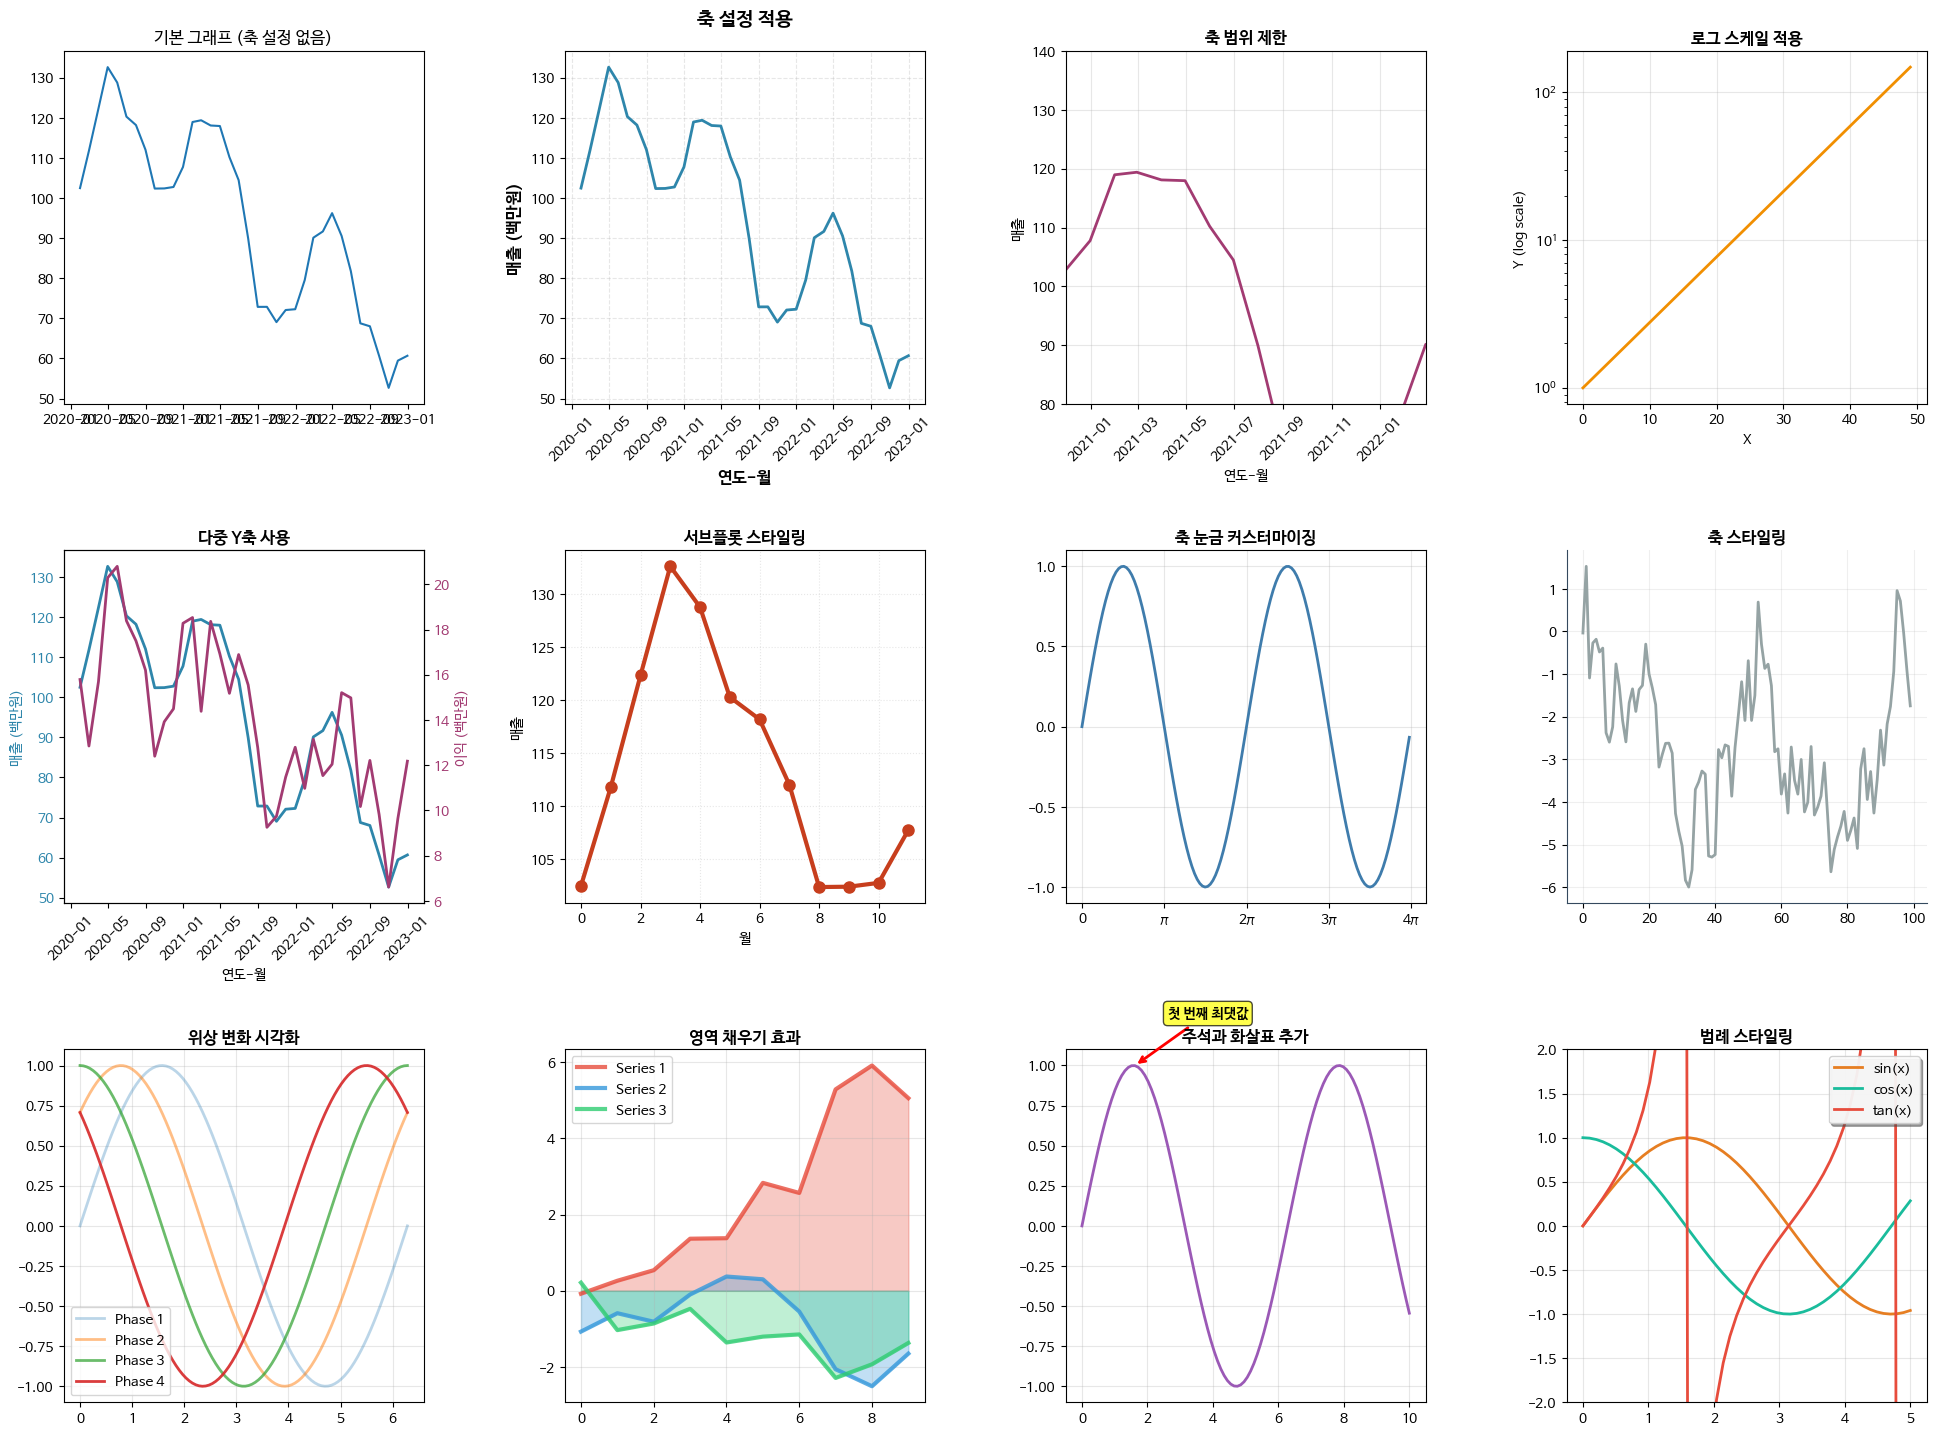

\n🎨 축 설정 및 레이아웃 팁:
- xlim, ylim으로 관심 영역 확대
- 로그 스케일로 큰 범위 데이터 표시
- 다중 축으로 서로 다른 단위 데이터 비교
- 주석으로 중요한 포인트 강조
- 색상과 투명도로 시각적 계층 구조 생성


In [6]:
# 실제 매출 데이터로 축 설정 실습
np.random.seed(42)
months_full = pd.date_range('2020-01', periods=36, freq='M')
sales_data = 100 + np.cumsum(np.random.randn(36) * 5) + np.sin(np.arange(36) * 2 * np.pi / 12) * 20

plt.figure(figsize=(20, 15))

# 1. 기본 그래프 vs 축 설정한 그래프
plt.subplot(3, 4, 1)
plt.plot(months_full, sales_data)
plt.title('기본 그래프 (축 설정 없음)')

plt.subplot(3, 4, 2)
plt.plot(months_full, sales_data, color='#2E86AB', linewidth=2)
plt.title('축 설정 적용', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('연도-월', fontsize=12, fontweight='bold')
plt.ylabel('매출 (백만원)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)

# 2. 축 범위 설정
plt.subplot(3, 4, 3)
plt.plot(months_full, sales_data, color='#A23B72', linewidth=2)
plt.xlim(months_full[10], months_full[25])  # 특정 기간만 표시
plt.ylim(80, 140)                          # 특정 범위만 표시
plt.title('축 범위 제한', fontsize=12, fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('매출')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. 로그 스케일
plt.subplot(3, 4, 4)
exponential_data = np.exp(np.linspace(0, 5, 50))
plt.plot(exponential_data, color='#F18F01', linewidth=2)
plt.yscale('log')  # Y축을 로그 스케일로
plt.title('로그 스케일 적용', fontsize=12, fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y (log scale)')
plt.grid(True, alpha=0.3)

# 4. 다중 축 (twin axes)
plt.subplot(3, 4, 5)
ax1 = plt.gca()
ax1.plot(months_full, sales_data, color='#2E86AB', linewidth=2, label='매출')
ax1.set_xlabel('연도-월')
ax1.set_ylabel('매출 (백만원)', color='#2E86AB')
ax1.tick_params(axis='y', labelcolor='#2E86AB')

ax2 = ax1.twinx()  # 두 번째 Y축 생성
profit_data = sales_data * 0.15 + np.random.randn(36) * 2
ax2.plot(months_full, profit_data, color='#A23B72', linewidth=2, label='이익')
ax2.set_ylabel('이익 (백만원)', color='#A23B72')
ax2.tick_params(axis='y', labelcolor='#A23B72')

plt.title('다중 Y축 사용', fontsize=12, fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 5. 서브플롯 간격 조절
plt.subplot(3, 4, 6)
plt.plot(sales_data[:12], color='#C73E1D', linewidth=3, marker='o', markersize=8)
plt.title('서브플롯 스타일링', fontsize=12, fontweight='bold')
plt.xlabel('월', fontsize=10)
plt.ylabel('매출', fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')

# 6. 축 눈금 커스터마이징
plt.subplot(3, 4, 7)
x = np.arange(0, 4*np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y, color='#3F7CAC', linewidth=2)
plt.xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi],
           ['0', 'π', '2π', '3π', '4π'])  # 눈금 라벨 커스터마이징
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.title('축 눈금 커스터마이징', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7. 축 제거 및 스타일링
plt.subplot(3, 4, 8)
plt.plot(np.random.randn(100).cumsum(), color='#95A3A4', linewidth=2)
plt.title('축 스타일링', fontsize=12, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)     # 위쪽 축선 제거
ax.spines['right'].set_visible(False)   # 오른쪽 축선 제거
ax.spines['left'].set_color('#34495E')  # 왼쪽 축선 색상
ax.spines['bottom'].set_color('#34495E') # 아래쪽 축선 색상
plt.grid(True, alpha=0.2)

# 8. 애니메이션 효과 (정적 시각화)
plt.subplot(3, 4, 9)
x = np.linspace(0, 2*np.pi, 100)
for i, phase in enumerate([0, np.pi/4, np.pi/2, 3*np.pi/4]):
    y = np.sin(x + phase)
    plt.plot(x, y, alpha=0.3 + i*0.2, linewidth=2,
             label=f'Phase {i+1}')
plt.title('위상 변화 시각화', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. 3D 효과 (2D에서 3D 느낌)
plt.subplot(3, 4, 10)
x = np.arange(10)
y1 = np.random.randn(10).cumsum()
y2 = np.random.randn(10).cumsum()
y3 = np.random.randn(10).cumsum()

plt.plot(x, y1, color='#E74C3C', linewidth=3, alpha=0.8, label='Series 1')
plt.plot(x, y2, color='#3498DB', linewidth=3, alpha=0.8, label='Series 2')
plt.plot(x, y3, color='#2ECC71', linewidth=3, alpha=0.8, label='Series 3')
plt.fill_between(x, y1, alpha=0.3, color='#E74C3C')
plt.fill_between(x, y2, alpha=0.3, color='#3498DB')
plt.fill_between(x, y3, alpha=0.3, color='#2ECC71')
plt.title('영역 채우기 효과', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 10. 텍스트 및 주석 추가
plt.subplot(3, 4, 11)
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, color='#9B59B6', linewidth=2)

# 최댓값 지점에 주석 추가
max_idx = np.argmax(y[:50])  # 첫 번째 피크
plt.annotate('첫 번째 최댓값',
             xy=(x[max_idx], y[max_idx]),
             xytext=(x[max_idx]+1, y[max_idx]+0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.title('주석과 화살표 추가', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 11. 범례 스타일링
plt.subplot(3, 4, 12)
x = np.linspace(0, 5, 50)
plt.plot(x, np.sin(x), color='#E67E22', linewidth=2, label='sin(x)')
plt.plot(x, np.cos(x), color='#1ABC9C', linewidth=2, label='cos(x)')
plt.plot(x, np.tan(x), color='#E74C3C', linewidth=2, label='tan(x)')

# 범례 스타일 커스터마이징
plt.legend(loc='upper right',
           frameon=True,           # 테두리 표시
           fancybox=True,         # 둥근 모서리
           shadow=True,           # 그림자
           framealpha=0.9,        # 투명도
           fontsize=10)
plt.title('범례 스타일링', fontsize=12, fontweight='bold')
plt.ylim(-2, 2)
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)  # 서브플롯 간격 조절
plt.show()

print("\\n🎨 축 설정 및 레이아웃 팁:")
print("- xlim, ylim으로 관심 영역 확대")
print("- 로그 스케일로 큰 범위 데이터 표시")
print("- 다중 축으로 서로 다른 단위 데이터 비교")
print("- 주석으로 중요한 포인트 강조")
print("- 색상과 투명도로 시각적 계층 구조 생성")


\n=== 4. 고급 그래프 유형과 실무 응용 ===

🎯 실무에서 자주 사용하는 고급 그래프:

1. 히트맵 (Heatmap): 상관관계, 성과 매트릭스
2. 박스플롯 (Box Plot): 분포와 이상치 탐지
3. 바이올린 플롯: 분포 모양 상세 확인
4. 에러바: 불확실성 표현
5. 스텝 플롯: 단계적 변화 표현
6. 파이 차트: 비율 표현



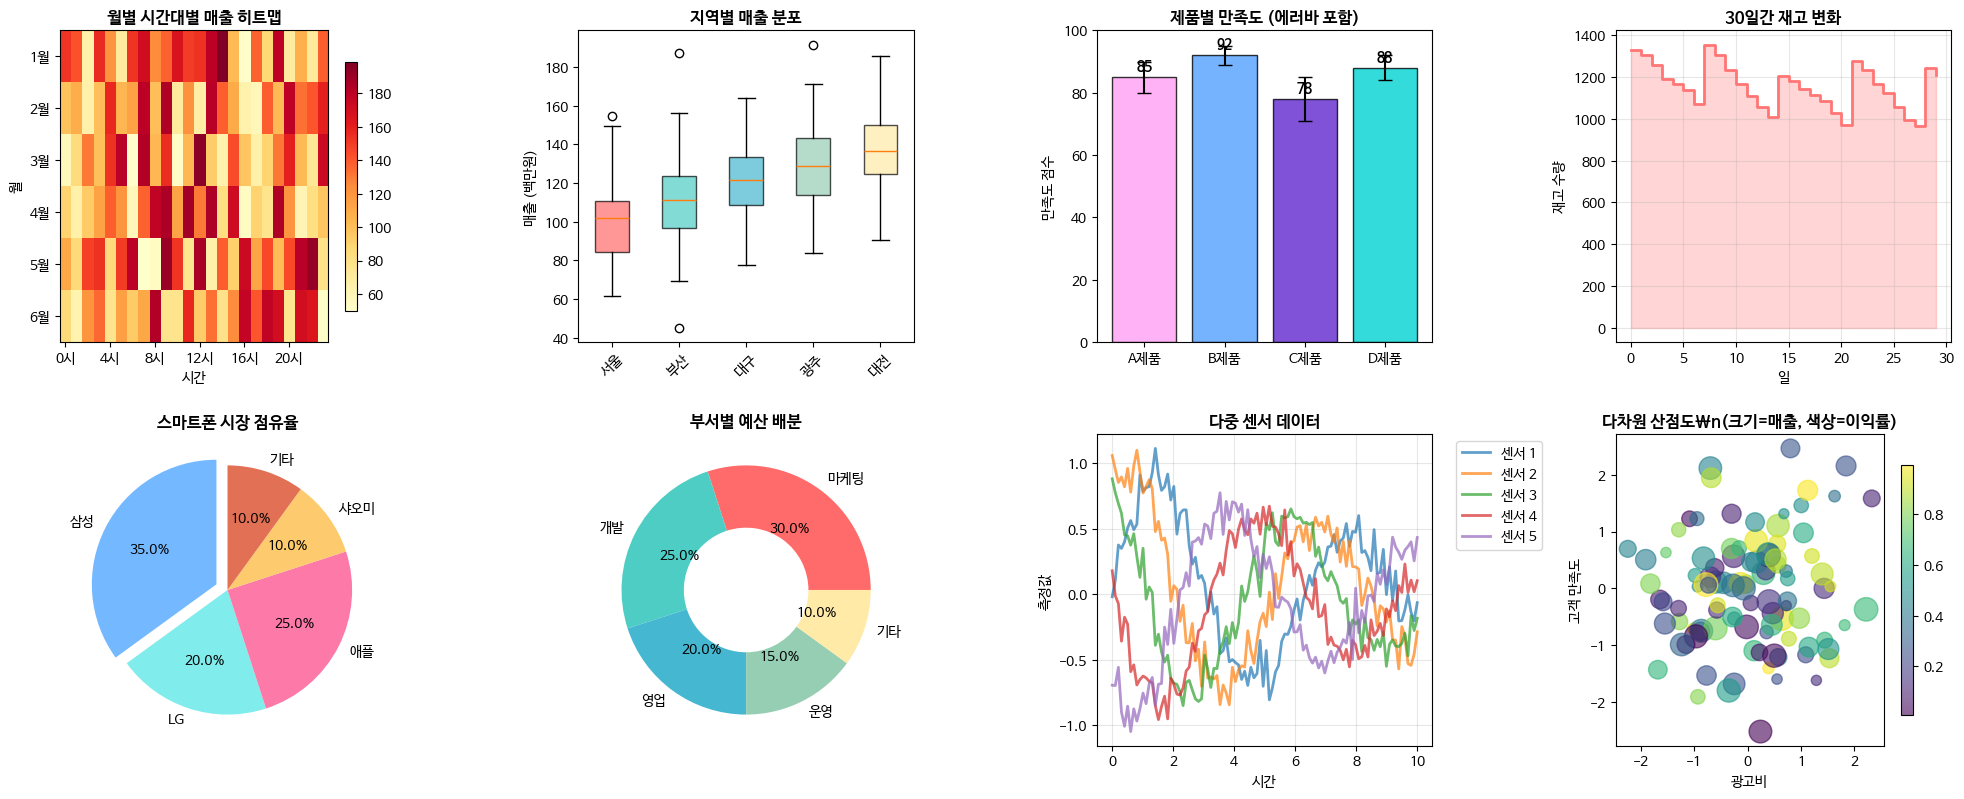

\n🚀 실무 시각화 팁:
- 히트맵: 시간별 패턴, 상관관계 분석
- 박스플롯: 이상치 탐지, 분포 비교
- 에러바: 불확실성 표현
- 파이차트: 전체 대비 비율 (5개 이하 권장)
- 레이더차트: 다차원 성과 평가
- 버블차트: 3차원 관계 표현


In [7]:
print("\\n=== 4. 고급 그래프 유형과 실무 응용 ===")

print("""
🎯 실무에서 자주 사용하는 고급 그래프:

1. 히트맵 (Heatmap): 상관관계, 성과 매트릭스
2. 박스플롯 (Box Plot): 분포와 이상치 탐지
3. 바이올린 플롯: 분포 모양 상세 확인
4. 에러바: 불확실성 표현
5. 스텝 플롯: 단계적 변화 표현
6. 파이 차트: 비율 표현
""")

plt.figure(figsize=(20, 16))

# 1. 히트맵 - 월별 시간대별 매출
plt.subplot(4, 4, 1)
np.random.seed(42)
hours = list(range(24))
months = ['1월', '2월', '3월', '4월', '5월', '6월']
sales_heatmap = np.random.randint(50, 200, (6, 24))

im = plt.imshow(sales_heatmap, cmap='YlOrRd', aspect='auto')
plt.colorbar(im, shrink=0.8)
plt.title('월별 시간대별 매출 히트맵', fontweight='bold')
plt.xlabel('시간')
plt.ylabel('월')
plt.xticks(range(0, 24, 4), [f'{h}시' for h in range(0, 24, 4)])
plt.yticks(range(6), months)

# 2. 박스플롯 - 지역별 매출 분포
plt.subplot(4, 4, 2)
regions = ['서울', '부산', '대구', '광주', '대전']
region_sales = [np.random.normal(100, 20, 100) + i*10 for i in range(5)]

bp = plt.boxplot(region_sales, labels=regions, patch_artist=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('지역별 매출 분포', fontweight='bold')
plt.ylabel('매출 (백만원)')
plt.xticks(rotation=45)

# 3. 에러바가 있는 막대 그래프
plt.subplot(4, 4, 3)
categories = ['A제품', 'B제품', 'C제품', 'D제품']
values = [85, 92, 78, 88]
errors = [5, 3, 7, 4]

bars = plt.bar(categories, values, yerr=errors, capsize=5,
               color=['#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3'],
               alpha=0.8, edgecolor='black', linewidth=1)

plt.title('제품별 만족도 (에러바 포함)', fontweight='bold')
plt.ylabel('만족도 점수')
plt.ylim(0, 100)

# 막대 위에 값 표시
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}', ha='center', va='bottom', fontweight='bold')

# 4. 스텝 플롯 - 재고 변화
plt.subplot(4, 4, 4)
days = list(range(30))
inventory = []
current = 1000
for day in days:
    if day % 7 == 0:  # 주마다 재입고
        current += np.random.randint(200, 400)
    current -= np.random.randint(20, 80)  # 일일 판매
    inventory.append(current)

plt.step(days, inventory, where='post', linewidth=2, color='#FF7675')
plt.fill_between(days, inventory, step='post', alpha=0.3, color='#FF7675')
plt.title('30일간 재고 변화', fontweight='bold')
plt.xlabel('일')
plt.ylabel('재고 수량')
plt.grid(True, alpha=0.3)

# 5. 파이 차트 - 시장 점유율
plt.subplot(4, 4, 5)
companies = ['삼성', 'LG', '애플', '샤오미', '기타']
market_share = [35, 20, 25, 10, 10]
colors = ['#74B9FF', '#81ECEC', '#FD79A8', '#FDCB6E', '#E17055']

wedges, texts, autotexts = plt.pie(market_share, labels=companies, colors=colors,
                                  autopct='%1.1f%%', startangle=90,
                                  explode=(0.1, 0, 0, 0, 0))  # 첫 번째 조각 분리

plt.title('스마트폰 시장 점유율', fontweight='bold')

# 6. 도넛 차트
plt.subplot(4, 4, 6)
sizes = [30, 25, 20, 15, 10]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
labels = ['마케팅', '개발', '영업', '운영', '기타']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        wedgeprops=dict(width=0.5))  # 도넛 모양 (width < 1)
plt.title('부서별 예산 배분', fontweight='bold')

# 7. 다중 선 그래프 (많은 데이터)
plt.subplot(4, 4, 7)
x = np.linspace(0, 10, 100)
for i in range(5):
    y = np.sin(x + i) * np.exp(-x/10) + np.random.normal(0, 0.1, 100)
    plt.plot(x, y, alpha=0.7, linewidth=2, label=f'센서 {i+1}')

plt.title('다중 센서 데이터', fontweight='bold')
plt.xlabel('시간')
plt.ylabel('측정값')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 8. 스케터 플롯 (크기와 색상)
plt.subplot(4, 4, 8)
n = 100
x = np.random.randn(n)
y = np.random.randn(n)
sizes = np.random.randint(50, 300, n)
colors = np.random.rand(n)

scatter = plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, cmap='viridis')
plt.colorbar(scatter, shrink=0.8)
plt.title('다차원 산점도\\n(크기=매출, 색상=이익률)', fontweight='bold')
plt.xlabel('광고비')
plt.ylabel('고객 만족도')

plt.tight_layout(pad=2.0)
plt.show()

print("\\n🚀 실무 시각화 팁:")
print("- 히트맵: 시간별 패턴, 상관관계 분석")
print("- 박스플롯: 이상치 탐지, 분포 비교")
print("- 에러바: 불확실성 표현")
print("- 파이차트: 전체 대비 비율 (5개 이하 권장)")
print("- 레이더차트: 다차원 성과 평가")
print("- 버블차트: 3차원 관계 표현")


# 선 그래프와 막대 그래프 실습

# 📊 각 그래프의 사용 목적과 언제 사용하는지 설명

📈 선 그래프 (Line Plot):
- ✅ 언제 사용? 시간에 따른 변화를 보여줄 때
- ✅ 예시: 주가 변동, 매출 추이, 온도 변화
- ✅ 장점: 트렌드 파악 용이, 여러 시리즈 비교 가능
- ❌ 주의: 범주형 데이터(성별, 지역)에는 부적절

📊 막대 그래프 (Bar Chart):
- ✅ 언제 사용? 범주별 수치를 비교할 때
- ✅ 예시: 지역별 판매량, 제품별 만족도, 연령대별 선호도
- ✅ 장점: 직관적 비교, 순위 표현 우수
- ❌ 주의: 시간 연속 데이터에는 부적절

📈 히스토그램 (Histogram):
- ✅ 언제 사용? 데이터의 분포를 확인할 때
- ✅ 예시: 나이 분포, 점수 분포, 소득 분포
- ✅ 장점: 정규분포인지, 치우침은 없는지 한 눈에 파악

🔍 산점도 (Scatter Plot):
- ✅ 언제 사용? 두 변수의 관계를 파악할 때
- ✅ 예시: 키와 몸무게, 광고비와 매출, 공부시간과 성적
- ✅ 장점: 상관관계, 이상치 발견 용이


In [11]:
print("=== 데이터 시각화 라이브러리 ===")
print(f"Matplotlib 버전: {plt.matplotlib.__version__}")

# 기본 데이터 생성 - 월별 매출 데이터
months = ['1월', '2월', '3월', '4월', '5월', '6월',
          '7월', '8월', '9월', '10월', '11월', '12월']
sales_2022 = [120, 135, 148, 162, 185, 201, 195, 210, 178, 165, 142, 158]
sales_2023 = [135, 149, 167, 178, 198, 215, 208, 225, 192, 180, 165, 175]



=== 데이터 시각화 라이브러리 ===
Matplotlib 버전: 3.9.4


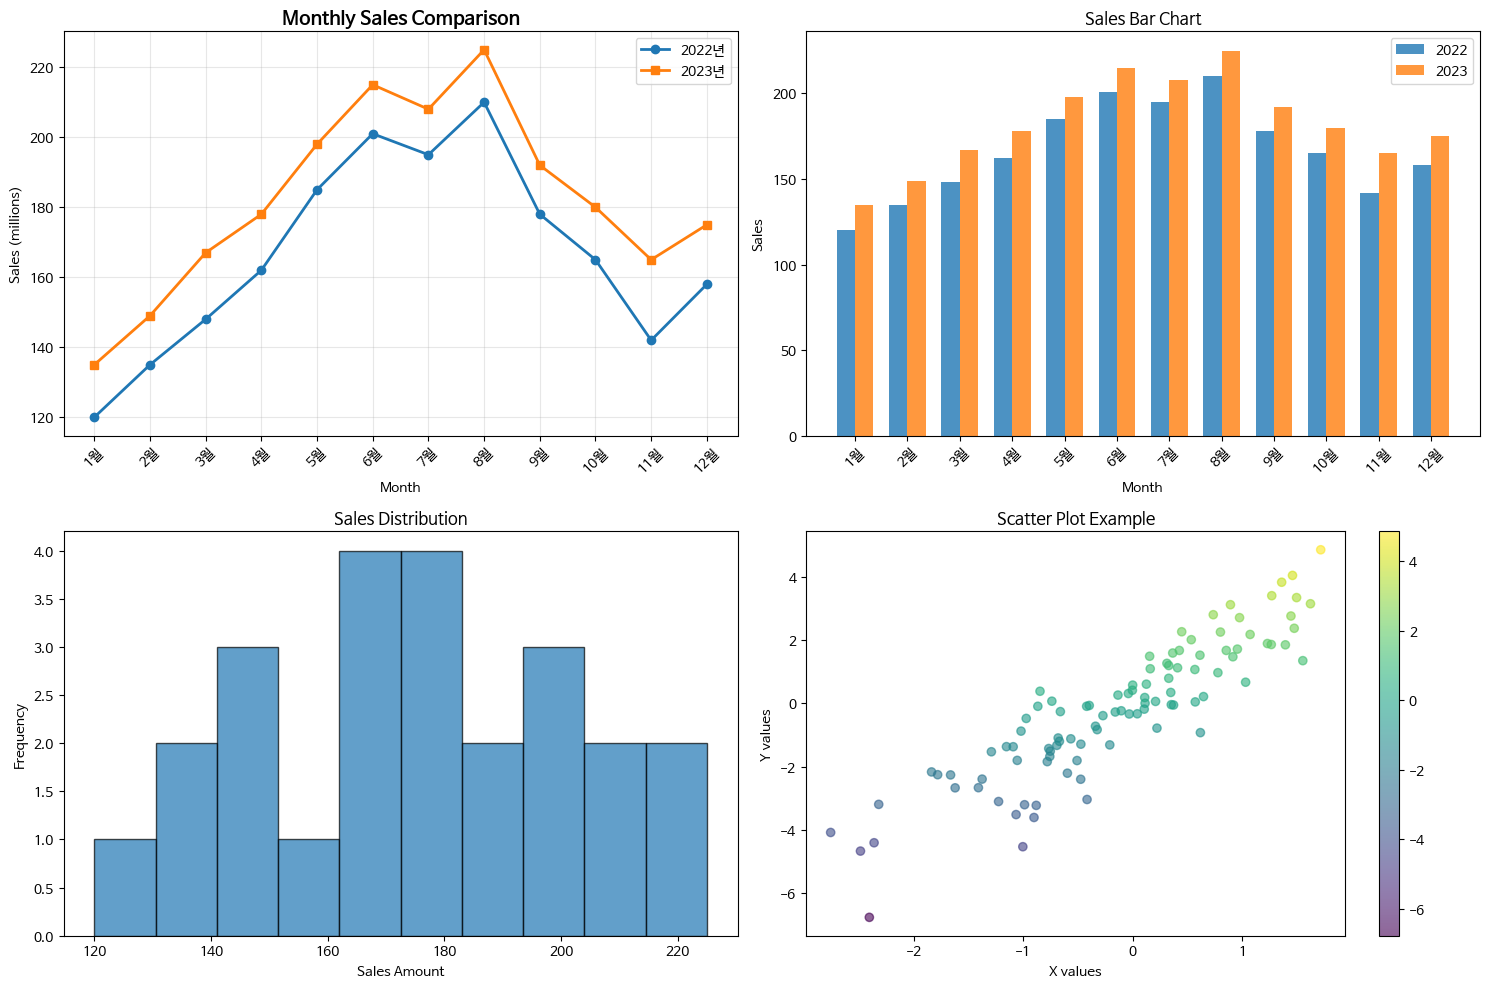

그래프 생성 완료! 다양한 시각화 기법을 확인해보세요.
\n=== 2. 색상과 스타일 완전 정복 ===

🎨 Matplotlib 색상 설정 방법:

1. 기본 색상 문자: 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'
2. 색상 이름: 'red', 'green', 'blue', 'orange', 'purple'
3. 헥스 코드: '#FF5733', '#33FF57', '#3357FF'
4. RGB 튜플: (0.2, 0.4, 0.6)
5. 투명도: alpha=0.7 (0=투명, 1=불투명)



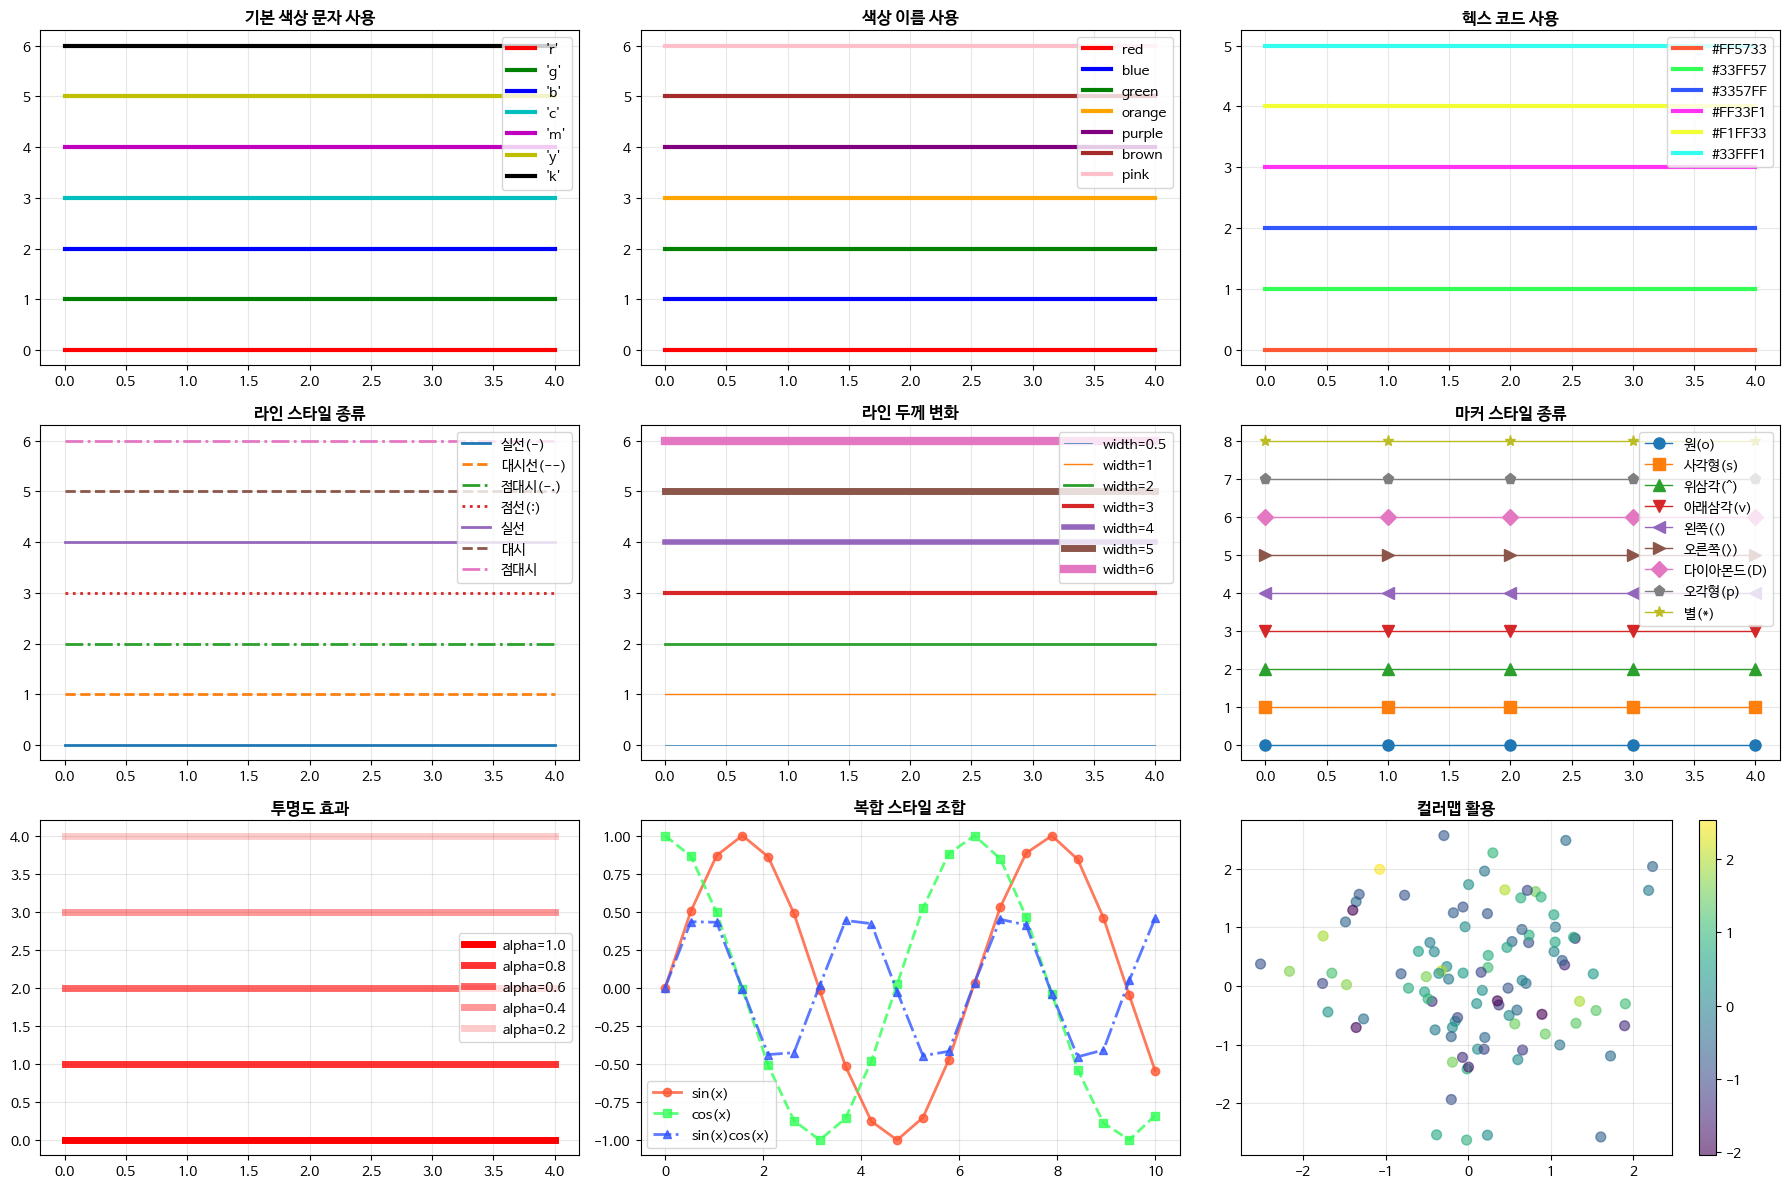


색상과 스타일 팁:
- 색상은 의미를 가져야 함 (빨강=위험, 파랑=안전)
- 색맹 사용자를 고려한 색상 선택
- 인쇄 시 흑백 변환 고려
- 라인 스타일로 구분 가능하게 설계


In [14]:


# 1. 기본 선 그래프
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(months, sales_2022, marker='o', linewidth=2, label='2022년')
plt.plot(months, sales_2023, marker='s', linewidth=2, label='2023년')
plt.title('Monthly Sales Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales (millions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. 막대 그래프
plt.subplot(2, 2, 2)
x_pos = np.arange(len(months))
width = 0.35
plt.bar(x_pos - width/2, sales_2022, width, label='2022', alpha=0.8)
plt.bar(x_pos + width/2, sales_2023, width, label='2023', alpha=0.8)
plt.title('Sales Bar Chart')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(x_pos, months, rotation=45)
plt.legend()

# 3. 히스토그램
plt.subplot(2, 2, 3)
all_sales = sales_2022 + sales_2023
plt.hist(all_sales, bins=10, alpha=0.7, edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')

# 4. 산점도
plt.subplot(2, 2, 4)
x_data = np.random.randn(100)
y_data = 2 * x_data + np.random.randn(100)
plt.scatter(x_data, y_data, alpha=0.6, c=y_data, cmap='viridis')
plt.title('Scatter Plot Example')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.colorbar()

plt.tight_layout()
plt.show()

print("그래프 생성 완료! 다양한 시각화 기법을 확인해보세요.")

print("\\n=== 2. 색상과 스타일 완전 정복 ===")

# 색상 설정의 다양한 방법
print("""
🎨 Matplotlib 색상 설정 방법:

1. 기본 색상 문자: 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'
2. 색상 이름: 'red', 'green', 'blue', 'orange', 'purple'
3. 헥스 코드: '#FF5733', '#33FF57', '#3357FF'
4. RGB 튜플: (0.2, 0.4, 0.6)
5. 투명도: alpha=0.7 (0=투명, 1=불투명)
""")

# 다양한 색상 예제
plt.figure(figsize=(18, 12))

# 1. 기본 색상 문자 사용
plt.subplot(3, 3, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, color in enumerate(colors):
    plt.plot(range(5), [i]*5, color=color, linewidth=3, label=f"'{color}'")
plt.title('기본 색상 문자 사용', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 색상 이름 사용
plt.subplot(3, 3, 2)
named_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
for i, color in enumerate(named_colors):
    plt.plot(range(5), [i]*5, color=color, linewidth=3, label=color)
plt.title('색상 이름 사용', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. 헥스 코드 사용
plt.subplot(3, 3, 3)
hex_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33F1', '#F1FF33', '#33FFF1']
for i, color in enumerate(hex_colors):
    plt.plot(range(5), [i]*5, color=color, linewidth=3, label=color)
plt.title('헥스 코드 사용', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. 라인 스타일 다양화
plt.subplot(3, 3, 4)
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
line_labels = ['실선(-)', '대시선(--)', '점대시(-.)', '점선(:)', '실선', '대시', '점대시']
for i, (style, label) in enumerate(zip(line_styles, line_labels)):
    plt.plot(range(5), [i]*5, linestyle=style, linewidth=2, label=label)
plt.title('라인 스타일 종류', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. 라인 두께 변화
plt.subplot(3, 3, 5)
line_widths = [0.5, 1, 2, 3, 4, 5, 6]
for i, width in enumerate(line_widths):
    plt.plot(range(5), [i]*5, linewidth=width, label=f'width={width}')
plt.title('라인 두께 변화', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. 마커 스타일
plt.subplot(3, 3, 6)
markers = ['o', 's', '^', 'v', '<', '>', 'D', 'p', '*']
marker_labels = ['원(o)', '사각형(s)', '위삼각(^)', '아래삼각(v)', '왼쪽(<)', '오른쪽(>)', '다이아몬드(D)', '오각형(p)', '별(*)']
for i, (marker, label) in enumerate(zip(markers, marker_labels)):
    plt.plot(range(5), [i]*5, marker=marker, markersize=8, label=label, linewidth=1)
plt.title('마커 스타일 종류', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. 투명도 효과
plt.subplot(3, 3, 7)
alphas = [1.0, 0.8, 0.6, 0.4, 0.2]
for i, alpha in enumerate(alphas):
    plt.plot(range(5), [i]*5, color='red', linewidth=5, alpha=alpha, label=f'alpha={alpha}')
plt.title('투명도 효과', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. 복합 스타일 (색상 + 라인 + 마커)
plt.subplot(3, 3, 8)
x = np.linspace(0, 10, 20)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

plt.plot(x, y1, color='#FF5733', linestyle='-', linewidth=2, marker='o',
         markersize=6, alpha=0.8, label='sin(x)')
plt.plot(x, y2, color='#33FF57', linestyle='--', linewidth=2, marker='s',
         markersize=6, alpha=0.8, label='cos(x)')
plt.plot(x, y3, color='#3357FF', linestyle='-.', linewidth=2, marker='^',
         markersize=6, alpha=0.8, label='sin(x)cos(x)')

plt.title('복합 스타일 조합', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. 컬러맵 사용
plt.subplot(3, 3, 9)
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.randn(100)

scatter = plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter)
plt.title('컬러맵 활용', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n색상과 스타일 팁:")
print("- 색상은 의미를 가져야 함 (빨강=위험, 파랑=안전)")
print("- 색맹 사용자를 고려한 색상 선택")
print("- 인쇄 시 흑백 변환 고려")
print("- 라인 스타일로 구분 가능하게 설계")


## 5. 정리 및 다음 강의 안내

### 🎯 6강에서 배운 핵심 내용

**1. 색상과 스타일 마스터 🎨**
- **다양한 색상 설정법**: 문자('r'), 이름('red'), 헥스('#FF0000'), RGB
- **라인 스타일 완전 정복**: 실선(-), 대시선(--), 점선(:), 점대시(-.)  
- **라인 두께로 중요도 표현**: linewidth=0.5~6 범위 활용
- **마커 스타일 다양화**: 원(o), 사각형(s), 삼각형(^), 다이아몬드(D), 별(*)
- **투명도(alpha) 효과**: 겹치는 데이터 표현, 계층 구조 생성

**2. 축 설정과 레이아웃 📏**
- **축 범위 제어**: xlim(), ylim()으로 관심 영역 확대
- **눈금 커스터마이징**: xticks(), yticks()로 의미있는 라벨 설정
- **로그 스케일 활용**: 큰 범위 데이터의 효과적 표현
- **다중 축 시스템**: twinx()로 서로 다른 단위 데이터 비교
- **주석과 화살표**: annotate()로 중요 포인트 강조
- **범례 스타일링**: 위치, 투명도, 테두리 등 세밀 조정

**3. 고급 그래프 유형 📊**
- **히트맵**: 시간별 패턴, 상관관계 매트릭스 시각화
- **박스플롯**: 분포 확인과 이상치 탐지의 강력한 도구
- **에러바**: 불확실성과 신뢰구간의 정확한 표현
- **파이/도넛차트**: 비율 정보의 직관적 전달
- **스텝 플롯**: 단계적 변화의 명확한 표현
- **버블차트**: 3차원 관계의 효과적 시각화

### 🛠️ 실습 과제

**기초 과제:**
1. **색상 마스터**: 같은 데이터를 5가지 색상 조합으로 표현하고 비교
2. **라인 스타일 실험**: 다양한 라인 스타일로 시계열 데이터 표현
3. **축 설정 연습**: xlim, ylim, 주석을 활용한 인사이트 강조 그래프

**심화 과제:**
1. **종합 대시보드**: 4개 이상의 서로 다른 그래프 조합 분석
2. **발표용 그래프**: 실무에서 사용할 수 있는 전문적 시각화
3. **스토리텔링**: 하나의 주제로 연결된 데이터 스토리

### 💡 실무 시각화 가이드라인

**✅ 전문적인 그래프 체크리스트:**
- [ ] 구체적이고 명확한 제목
- [ ] 축 라벨과 단위 표시
- [ ] 색상이 의미를 전달
- [ ] 일관된 색상 체계
- [ ] 적절한 그래프 유형 선택
- [ ] 충분한 여백과 가독성

**🎨 색상 선택 전략:**
- **범주형 데이터**: 구별되는 색상 사용
- **순서형 데이터**: 그라데이션 활용
- **강조용**: 대비 색상으로 포인트 표시
- **접근성**: 색맹 친화적 팔레트 고려

### 🔜 다음 강의: 머신러닝 개념 이해

**7강 미리보기:**
- **지도학습 vs 비지도학습**: 실생활 예시로 완전 이해
- **회귀 vs 분류 문제**: 언제 어떤 방법을 사용할까?
- **모델 평가 지표**: 정확도, 정밀도, 재현율의 실무적 의미
- **과적합과 일반화**: 좋은 모델의 조건

**🔗 시각화와 머신러닝의 연결:**
- 데이터 분포 확인 → 전처리 방향 결정
- 상관관계 시각화 → 특성 선택 가이드  
- 모델 성능 시각화 → 개선 방향 도출
- 예측 결과 시각화 → 비즈니스 인사이트

**🎨 Matplotlib 스타일링 완전 정복 달성!**

이제 여러분은:
- ✅ **색상, 라인, 마커**를 의도에 맞게 자유자재로 조절
- ✅ **축 설정과 레이아웃**으로 전문가 수준의 그래프 제작  
- ✅ **다양한 그래프 유형**을 상황에 따라 적절히 선택
- ✅ **실무 가이드라인**을 통한 품질 높은 시각화